# Evaluating a Hypothesis

Once we have done some trouble shooting for errors in our predictions by:

- Getting more training examples
- Trying smaller sets of features
- Trying additional features
- Trying polynomial features
- Increasing or decreasing λ

We can move on to evaluate our new hypothesis.

A hypothesis may have a low error for the training examples but still be inaccurate (because of overfitting). Thus, to evaluate a hypothesis, given a dataset of training examples, we can split up the data into two sets: a **training set** and a **test set**. Typically, the training set consists of 70% of your data and the test set is the remaining 30%.

The new procedure using these two sets is then:
1. Learn $\Theta$ and minimize $J_{train}(\Theta)$  using the training set
2. Compute the test set error $J_{test}(\Theta)$

### The test set error

1. For linear regression: $J_{test}(\Theta) = \dfrac{1}{2m_{test}} \sum_{i=1}^{m_{test}}(h_\Theta(x^{(i)}_{test}) - y^{(i)}_{test})^2$

2. For classification ~ Misclassification error (aka 0/1 misclassification error):

$$err(h_\Theta(x),y) = \begin{matrix} 1 & \mbox{if } h_\Theta(x) \geq 0.5\ and\ y = 0\ or\ h_\Theta(x) < 0.5\ and\ y = 1\newline 0 & \mbox otherwise \end{matrix}$$

This gives us a binary 0 or 1 error result based on a misclassification. The average test error for the test set is:

$\text{Test Error} = \dfrac{1}{m_{test}} \sum^{m_{test}}_{i=1} err(h_\Theta(x^{(i)}_{test}), y^{(i)}_{test})$

This gives us the proportion of the test data that was misclassified.

# Model Selection and Train/Validation/Test Sets

Just because a learning algorithm fits a training set well, that does not mean it is a good hypothesis. It could over fit and as a result your predictions on the test set would be poor. The error of your hypothesis as measured on the data set with which you trained the parameters will be lower than the error on any other data set.

Given many models with *different polynomial degrees*, we can use a systematic approach to identify the 'best' function. In order to **choose the model of your hypothesis**, you can test each degree of polynomial and look at the error result.

One way to break down our dataset into the three sets is:
- Training set: 60%
- Cross validation set: 20%
- Test set: 20%

We can now calculate three separate error values for the three different sets using the following method:

1. Optimize the parameters in $\Theta$ using the **training set** for each polynomial degree.
2. Find the polynomial degree d with the least error using the **cross validation set**.
3. Estimate the *generalization error* using the **test set** with $J_{test}(\Theta^{(d)})$, (d = theta from polynomial with lower error);

This way, **the degree of the polynomial d has not been trained using the test set**.

# Diagnosing Bias vs. Variance

In this section we examine the relationship between the degree of the polynomial d and the underfitting or overfitting of our hypothesis.

- We need to distinguish whether **bias** or **variance** is the problem contributing to bad predictions.
- **High bias is underfitting** and **high variance is overfitting**. Ideally, we need to find a golden mean between these two.

The training error will tend to **decrease** as we increase the degree d of the polynomial.

At the same time, the cross validation error will tend to **decrease** as we increase d up to a point, and then it will **increase** as d is increased, forming a convex curve.

**High bias (underfitting):** both $J_{train}(\Theta)$ and $J_{CV}(\Theta)$ will be high. Also,  $J_{CV}(\Theta) \approx J_{train}(\Theta)$

**High variance (overfitting):** $J_{train}(\Theta)$ will be low and $J_{CV}(\Theta)$ will be much greater than $J_{train}(\Theta)$.

The is summarized in the figure below:

![](img/47.png)

# Regularization and Bias/Variance

**Note:** [The regularization term below and through out the video should be $\frac \lambda {2m} \sum _{j=1}^n \theta_j ^2$ and NOT $\frac \lambda {2m} \sum _{j=1}^m \theta_j ^2$]

![](img/48.png)

In the figure above, we see that as $\lambda$ increases, our fit becomes more rigid. On the other hand, as $\lambda$ approaches 0, we tend to over overfit the data. So how do we choose our parameter $\lambda$ to get it 'just right' ? In order to choose the model and the regularization term $\lambda$, we need to:

1. Create a list of lambdas (i.e. $\lambda \in \{0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24\}$);
2. Create a set of models with different degrees or any other variants.
3. Iterate through the $\lambda$s and for each $\lambda$ go through all the models to learn some $\Theta$.
4. Compute the cross validation error using the learned $\Theta$ (computed with $\lambda$) on the $J_{CV}(\Theta)$ **without** regularization or $\lambda = 0$.
5. Select the best combo that produces the lowest error on the cross validation set.
6. Using the best combo $\Theta$ and $\lambda$, apply it on $J_{test}(\Theta)$ to see if it has a good generalization of the problem.

![](img/49.png)

# Learning Curves (ใช้แยกว่าเป็นปัญหาเพราะ Bias or Variance)

ขนาดของ Error เทียบกับ จำนวนข้อมูลที่ใช้ train m

Training an algorithm on a very few number of data points (such as 1, 2 or 3) will easily have 0 errors because we can always find a quadratic curve that touches exactly those number of points. Hence:

- As the training set gets larger, the error for a quadratic function increases.
- The error value will plateau out after a certain m, or training set size.

### Experiencing high bias:

**Low training set size:** causes $J_{train}(\Theta)$  to be low and $J_{CV}(\Theta)$ to be high.

**Large training set size:** causes both $J_{train}(\Theta)$ and $J_{CV}(\Theta)$ to be high with $J_{train}(\Theta) \approx J_{CV}(\Theta)$.

If a learning algorithm is suffering from **high bias**, getting more training data will not **(by itself)** help much. (ได้ data มาเยอะขึ้นก็ไม่ค่อยช่วยให้อะไรดีขึ้น)

![](img/50.png)

### Experiencing high variance:

**Low training set size:** $J_{train}(\Theta)$ will be low and $J_{CV}(\Theta)$ will be high.

**Large training set size:** $J_{train}(\Theta)$ increases with training set size and $J_{CV}(\Theta)$ continues to decrease without leveling off. Also, $J_{train}(\Theta) < J_{CV}(\Theta)$ but the difference between them remains significant.

If a learning algorithm is suffering from **high variance**, getting more training data is likely to help. (ได้ data มาเยอะขึ้นจะช่วยได้)

![](img/51.png)

# Deciding What to Do Next Revisited

Our decision process can be broken down as follows: สิ่งที่สามารถทำได้เมื่อ error จาก CV set หรือ Test set มันเยอะมากจนเกินรับไหว

- **Getting more training examples:** Fixes high variance
- **Trying smaller sets of features:** Fixes high variance
- **Adding features:** Fixes high bias
- **Adding polynomial features:** Fixes high bias
- **Decreasing λ:** Fixes high bias
- **Increasing λ:** Fixes high variance.

### Diagnosing Neural Networks
- A neural network with fewer parameters is **prone to underfitting**. It is also **computationally cheaper**.
- A large neural network with more parameters is **prone to overfitting**. It is also **computationally expensive**. In this case you can use regularization (increase λ) to address the overfitting.

Using a single hidden layer is a good starting default. You can train your neural network on a number of hidden layers using your cross validation set. You can then select the one that performs best.

### Model Complexity Effects:

- Lower-order polynomials (low model complexity) have high bias and low variance. In this case, the model fits poorly consistently.
- Higher-order polynomials (high model complexity) fit the training data extremely well and the test data extremely poorly. These have low bias on the training data, but very high variance.
- In reality, we would want to choose a model somewhere in between, that can generalize well but also fits the data reasonably well.

# ================== CODE ===================

In [72]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat

# ข้อมูล การเปลี่ยนแปลงของระดับน้ำ x กับจำนวนของการไหลของน้ำออกจาก dam y
data = loadmat('programing/machine-learning-ex5/ex5/ex5data1.mat')

# training set 60%
X = data['X']
y = data['y']

# cross validation set 20%
Xval = data['Xval']
yval = data['yval']

# test set 20%
Xtest = data['Xtest']
ytest = data['ytest']

In [73]:
X.shape,len(y),len(Xtest),len(ytest),len(Xval),len(yval)

((12, 1), 12, 21, 21, 21, 21)

### 1.1 Plot ข้อมูล

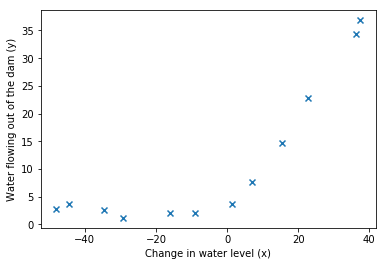

In [74]:
plt.scatter(X,y,marker='x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

### 1.2 Regularized linear regression cost function 

In [75]:
def linearRegCostFunction(X,y,theta,lamb):
    theta = np.matrix(theta) # n x 1
    X = np.matrix(X) # m x n (รวม column 1 แล้ว)
    y = np.matrix(y) # m x 1
    m = len(y)
    
    h = (X).dot(theta)
    first = (1/(2*m))*((h-y).T).dot(h-y)
    second = (lamb/(2*m))*np.sum(np.power(theta[1:theta.shape[0],:], 2))
    return (first + second)[0,0]

ทดสอบ `costLinearRegression(theta,X,y,lamb)`

โดยถ้า theta = [1 ; 1] this value should be about 303.993192

In [76]:
theta1 = np.matrix([[1],[1]])
m1 = len(y)
ones1 = np.ones((m1,1))     # mx1
X1 = np.hstack((ones1,X))   # mxn = mx2 
J1 = linearRegCostFunction(X1, y, theta1, 1)
J1

303.99319222026429

ถูกต้องตามต้องการ

### 1.3 Regularized linear regression gradient

In [81]:
def linearRegGradFunction(X,y,theta,lamb):
    theta = np.matrix(theta) # n x 1
    X = np.matrix(X) # m x n (รวม column 1 แล้ว)
    y = np.matrix(y) # m x 1
    m = len(y)
    
    h = X.dot(theta) # m x 1
    left = (1/m)*(h-y).T.dot(X) # 1xn
    grad = np.zeros((len(theta),1))
    for j in range(len(theta)):
        if j is not 0:
            grad[j,0] = left[0,j] + (lamb/m)*theta[j,0]
        else:
            grad[j,0] = left[0,j]
    return grad

ทดสอบ

โดยที่ถ้า Gradient at theta = [1 ; 1]: this value should be about [-15.303016; 598.250744]

In [83]:
grad1 = linearRegGradFunction(X1,y,theta1,1)
grad1

array([[ -15.30301567],
       [ 598.25074417]])

ถูกต้องตามต้องการ

### 1.4 Fitting linear regression